# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid="+weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | minacu
City not found. Skipping...
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | phayao
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | dhidhdhoo
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | hailar
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | kingston
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | howrah
Processing Record 21 of Set 1 | alotau
Proces

In [80]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          271
Lat           271
Lng           271
Max Temp      271
Humidity      271
Cloudiness    271
Wind Speed    271
Country       271
Date          271
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-25.44,90,100,4.73,RU,1738123791
1,port-aux-francais,-49.3500,70.2167,5.49,82,66,13.75,TF,1738123792
2,east london,-33.0153,27.9116,23.12,85,3,7.96,ZA,1738123795
3,roma,43.2128,-75.4557,-6.85,89,100,5.14,US,1738123796
4,phayao,19.2500,100.2500,25.83,34,22,1.43,TH,1738123797


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [83]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.44,90,100,4.73,RU,1738123791
1,port-aux-francais,-49.3500,70.2167,5.49,82,66,13.75,TF,1738123792
2,east london,-33.0153,27.9116,23.12,85,3,7.96,ZA,1738123795
3,roma,43.2128,-75.4557,-6.85,89,100,5.14,US,1738123796
4,phayao,19.2500,100.2500,25.83,34,22,1.43,TH,1738123797


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

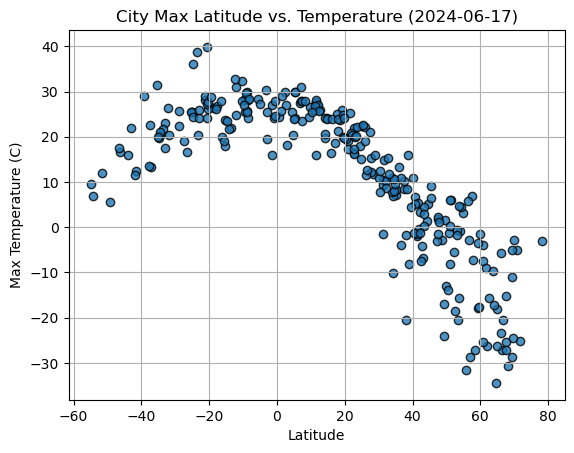

In [84]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black',marker="o",linewidths=1,alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

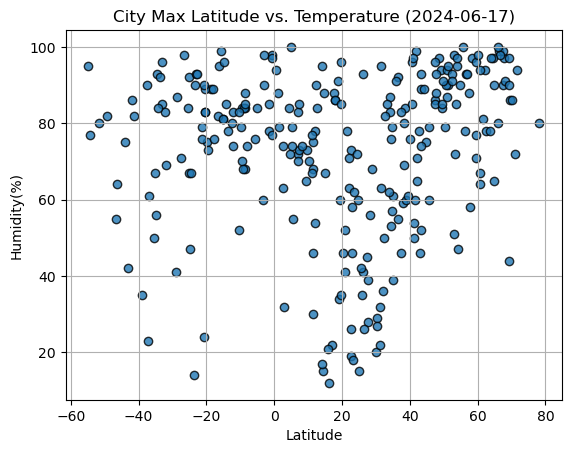

In [85]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black',marker="o",linewidths=1,alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

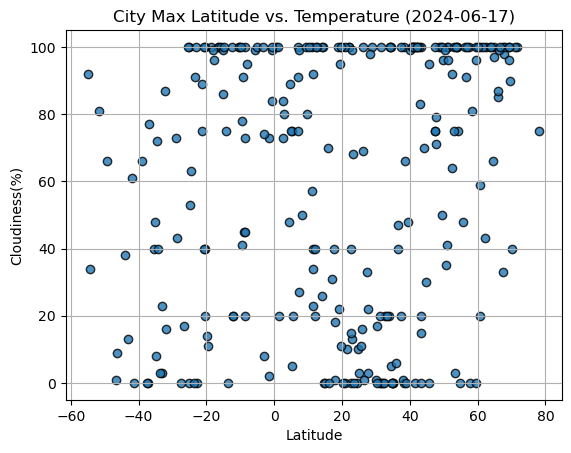

In [86]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black',marker="o",linewidths=1,alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

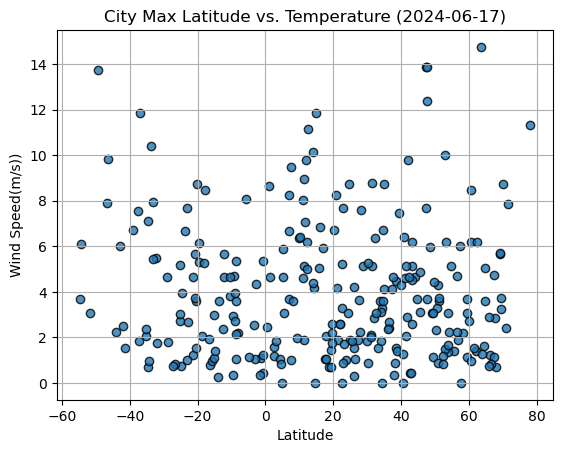

In [87]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black',marker="o",linewidths=1,alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s))")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_values,y_values,coordinates,label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.title(f"Latitude Vs. {label}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>= 0)]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.44,90,100,4.73,RU,1738123791
3,roma,43.2128,-75.4557,-6.85,89,100,5.14,US,1738123796
4,phayao,19.2500,100.2500,25.83,34,22,1.43,TH,1738123797
5,georgetown,5.4112,100.3354,29.96,55,20,3.09,MY,1738123798
6,dhidhdhoo,6.8833,73.1000,27.46,72,91,3.70,MV,1738123799


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.49,82,66,13.75,TF,1738123792
2,east london,-33.0153,27.9116,23.12,85,3,7.96,ZA,1738123795
7,port mathurin,-19.6833,63.4167,26.59,75,14,5.31,MU,1738123801
9,waitangi,-43.9535,-176.5597,16.01,75,38,2.24,NZ,1738123803
10,grytviken,-54.2811,-36.5092,6.97,77,34,6.09,GS,1738123804


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7942216926081146


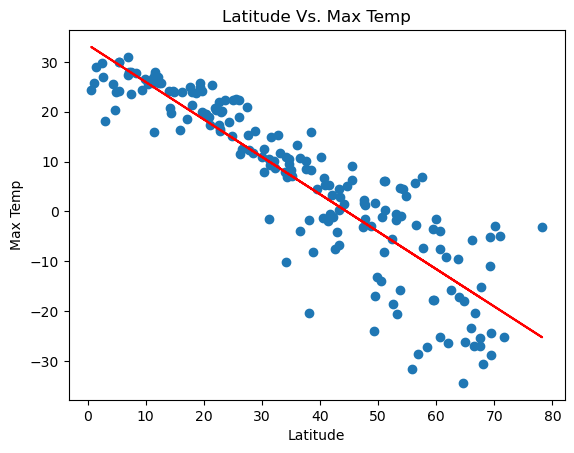

In [91]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(0,-40),"Max Temp")

The r^2-value is: 0.34273461171865816


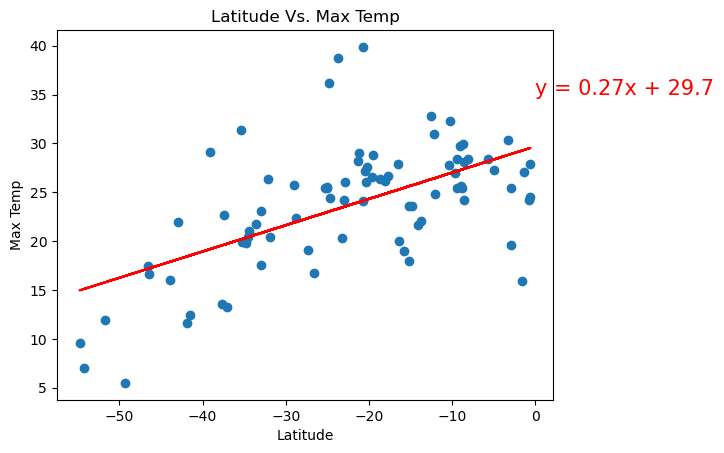

In [92]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(0,35),"Max Temp")

**Discussion about the linear relationship:** I know that my graph is incorrect due to the coordinates on this one, but it shows that there is a clear relationship between Latitudes and the temperature being higher. The higher the latitude the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.14843315676503993


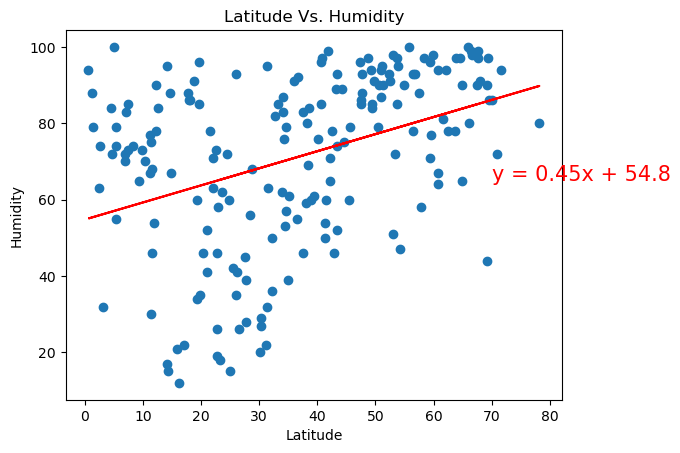

In [93]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(70,65),"Humidity")

The r^2-value is: 0.050106015197326874


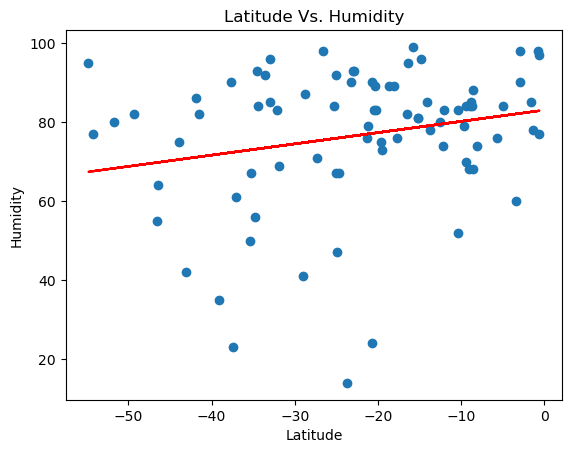

In [94]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(75,75),"Humidity")

**Discussion about the linear relationship:** There seems to not be as much of a relationship when it comes to latitude and humidity as the plot seems to be more scattered and less in a specific direction like there was with Max Temp.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0617149585818891


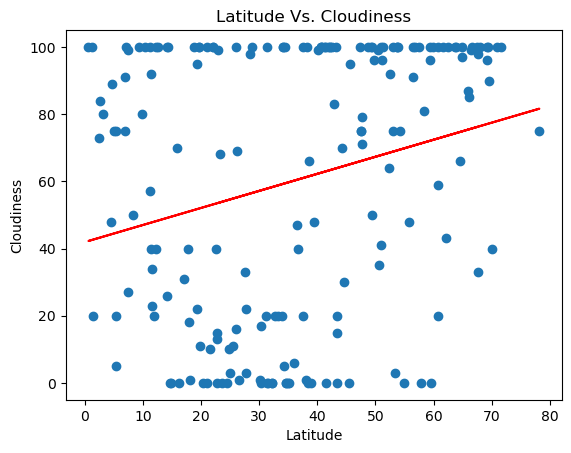

In [95]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(100,80),"Cloudiness")

The r^2-value is: 0.12038746875926737


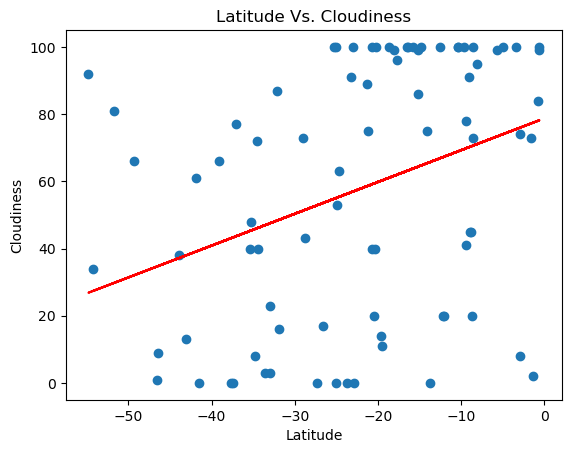

In [96]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(100,-50),"Cloudiness")

**Discussion about the linear relationship:** I still can't get the coordinates right, but based on the scatter data I do not see a strong correlation with the latitude and the cloudiness either. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007367014348874512


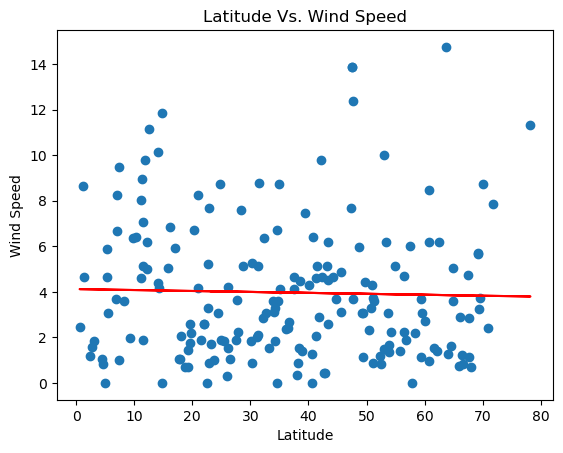

In [97]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(70,65),"Wind Speed")

The r^2-value is: 0.128256041295388


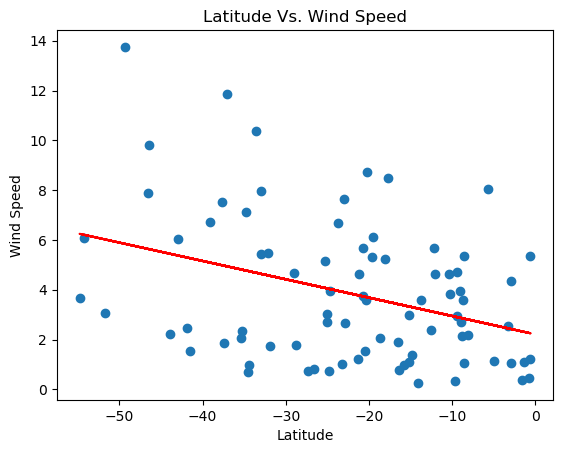

In [98]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(100,-50),"Wind Speed")

**Discussion about the linear relationship:** I think the wind speeds seem to be similar on the southern and nothern hemisphere so I do not feel that there is a strong correlation between them and the latitude. 